# Import packages

In [1]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pickle
import matplotlib.style as style
import seaborn as sns

# Load Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop('Id',1)
train.columns
test = test.drop('Id',1)

# Clean Dataset
   Modify NAs if needed according to the data description

In [3]:
# df.Alley = df.Alley.fillna('NoAlley')
# df.BsmtQual = df.BsmtQual.fillna("NoBase")
# df.BsmtCond = df.BsmtCond.fillna("NoBase")
# df.BsmtExposure = df.BsmtExposure.fillna("NoBase")
# df.BsmtFinType1 = df.BsmtFinType1.fillna("NoBase")
# df.BsmtFinType2 = df.BsmtFinType2.fillna("NoBase")
# df.FireplaceQu = df.FireplaceQu.fillna("NoFire")
# df.GarageType = df.GarageType.fillna("NoGar")
# df.GarageFinish = df.GarageFinish.fillna("NoGar")
# df.GarageQual = df.GarageQual.fillna("NoGar")
# df.GarageCond = df.GarageCond.fillna("NoGar")
# df.PoolQC = df.PoolQC.fillna("NoPool")
# df.Fence = df.Fence.fillna("NoFen")
# df.MiscFeature = df.MiscFeature.fillna("NoMF")
# df.LotFrontage = df.LotFrontage.fillna(0)
# df.MasVnrArea = df.MasVnrArea.fillna(0)

# Make Binary variable values 0 and 1 

In [4]:
# #binary categorical variables are 'Street','CentralAir'

# df['Street'] = df['Street'].replace(['Pave'],0)
# df['Street'] = df['Street'].replace(['Grvl'],1)

# df['CentralAir'] = df['CentralAir'].replace(["Y"], 1)
# df['CentralAir'] = df['CentralAir'].replace(["N"], 0)


# Create pickle of df

In [5]:
# with open('cleaned_df.pkl', 'wb') as f:
#     pickle.dump(df, f)

# feature engineering


In [6]:
total = train.isnull().sum().sort_values(ascending = False)[train.isnull().sum().sort_values(ascending = False) != 0]
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100,2)[round(train.isnull().sum().sort_values(ascending = False)/len(train)*100,2) != 0]
pd.concat([total, percent], axis=1, keys=['Total_missing','Percent_wise'])


,Total_missing,Percent_wise
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [7]:
total = test.isnull().sum().sort_values(ascending = False)[test.isnull().sum().sort_values(ascending = False) != 0]
percent = round(test.isnull().sum().sort_values(ascending = False)/len(train)*100,2)[round(test.isnull().sum().sort_values(ascending = False)/len(train)*100,2) != 0]
pd.concat([total, percent], axis=1, keys=['Total_missing','Percent_wise'])


,Total_missing,Percent_wise
PoolQC,1456,99.73
MiscFeature,1408,96.44
Alley,1352,92.60
Fence,1169,80.07
FireplaceQu,730,50.00
LotFrontage,227,15.55
GarageYrBlt,78,5.34
GarageFinish,78,5.34
GarageQual,78,5.34
GarageCond,78,5.34


In [8]:
# We first impute the variables in which none is imputed in both the training and testing sets.
features_impute = ['MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageYrBlt', 'GarageType', 'GarageQual', 'GarageFinish', 
                   'GarageCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond']

for feature in features_impute:
    train[feature] = train[feature].replace(np.nan, 'None') 
    test[feature] = test[feature].replace(np.nan, 'None') 

# We now impute PoolQC
train['PoolQC'] = train['PoolQC'].replace(np.nan, 0) 
test['PoolQC'] = test['PoolQC'].replace(np.nan, 0) 

# We now impute the features for which an imputation method was used:
# LotFrontage

train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

for i in range(0, test.shape[0]):
    if test['Neighborhood'].iloc[i] in list(train['Neighborhood'].unique()):
        test['LotFrontage'].iloc[i] = train.groupby('Neighborhood')['LotFrontage'].median()[test['Neighborhood'].iloc[i]]
    else:
        test['LotFrontage'].iloc[i] = train['LotFrontage'].median()

# MasVnrArea
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())
test['MasVnrArea'] = test['MasVnrArea'].fillna(train['MasVnrArea'].median())

# MasVnrType
train['MasVnrType'] = train['MasVnrType'].apply(lambda x: str(x))
train['MasVnrType'] = train['MasVnrType'].apply(lambda x: train['MasVnrType'].mode() if x == 'nan' else x)

test['MasVnrType'] = test['MasVnrType'].apply(lambda x: str(x))
test['MasVnrType'] = test['MasVnrType'].apply(lambda x: train['MasVnrType'].mode() if x == 'nan' else x)

# Electrical(only missing value is in the testing set)
train['Electrical'] = train['Electrical'].apply(lambda x: str(x))
train['Electrical'] = train['Electrical'].apply(lambda x: train['Electrical'].mode() if x == 'nan' else x)

test['Electrical'] = test['Electrical'].apply(lambda x: str(x))
test['Electrical'] = test['Electrical'].apply(lambda x: train['Electrical'].mode() if x == 'nan' else x)

# CHECK IF THIS WAS DONE PROPERLY OR IF THIS MEDIANS AND MODES SHOULD HAVE BEEN LEARNED IN THE TRAINING DATAFRAME.


# Check if there are still missing values:

# Total number of missing values in the training dataframe
print('The number of missing values in the training set is {}.'.format(train.isna().sum().sum()))
# Total number of missing values in the training dataframe
print('The number of missing values in the testing set is {}.'.format(test.isna().sum().sum()))




The number of missing values in the training set is 0.
The number of missing values in the testing set is 22.


In [9]:
total = test.isnull().sum().sort_values(ascending = False)[test.isnull().sum().sort_values(ascending = False) != 0]
percent = round(test.isnull().sum().sort_values(ascending = False)/len(train)*100,2)[round(test.isnull().sum().sort_values(ascending = False)/len(train)*100,2) != 0]
pd.concat([total, percent], axis=1, keys=['Total_missing','Percent_wise'])


,Total_missing,Percent_wise
MSZoning,4,0.27
BsmtFullBath,2,0.14
BsmtHalfBath,2,0.14
Utilities,2,0.14
Functional,2,0.14
BsmtFinSF1,1,0.07
KitchenQual,1,0.07
Exterior1st,1,0.07
GarageCars,1,0.07
GarageArea,1,0.07


In [10]:
from scipy.stats import pearsonr
print(pearsonr(train['GarageCars'], train['GarageArea']))
print(pearsonr(train['GrLivArea'], train['TotRmsAbvGrd']))
print(pearsonr(train['TotalBsmtSF'], train['1stFlrSF']))
print(pearsonr(train['GrLivArea'], train['TotRmsAbvGrd']))

(0.8824754142814621, 0.0)
(0.825489374308843, 0.0)
(0.8195299750050331, 0.0)
(0.825489374308843, 0.0)


# TotalSF: this new feature is created by adding up other variables that add up to the total square footage of each house/observation.


In [11]:
# Training set
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# Test set
test['TotalSF']= test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

# Total bathrooms: this new feature includes the number of bathrooms in the house/observation.


In [12]:
# Training set
train['Total_Bathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                               train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

# Test set
test['Total_Bathrooms'] = (test['FullBath'] + (0.5 * test['HalfBath']) +
                               test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))

# Total_porch_sf: new feature that includes the total square footage of the porch in each house/observation.


In [13]:
# Training set
train['Total_porch_sf'] = (train['OpenPorchSF'] + train['3SsnPorch'] +
                              train['EnclosedPorch'] +train['ScreenPorch'] +
                              train['WoodDeckSF'])

# Test set
test['Total_porch_sf'] = (test['OpenPorchSF'] + test['3SsnPorch'] +
                              test['EnclosedPorch'] + test['ScreenPorch'] +
                              test['WoodDeckSF'])


In [14]:
#YrBltAndRemod: this variable adds the year the house was remodeled to the house it was built.

train['YrBltAndRemod'] = train['YearBuilt'] +train['YearRemodAdd']
test['YrBltAndRemod'] = test['YearBuilt'] + test['YearRemodAdd']



We create a series of dummy features that gathers information on whether any of the following are present in the house:
1. haspool: whether there is a pool.
2. has2ndfloor: whether there is a second floor.
3. hasgarage: whether there is a garage.
4. hasbsmt: whether there is a basement.
5. hasfireplace: whether there is a fireplace.

In [15]:
# Training set
train['haspool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['has2ndfloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasfireplace'] =train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# Test set
test['haspool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['has2ndfloor'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test['hasgarage'] = test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test['hasbsmt'] = test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test['hasfireplace'] = test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

We now drop the variable out of which the new featues were created.


In [16]:
# Training set
train.drop(columns = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'FullBath', 'HalfBath', 
                        'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 
                        'ScreenPorch', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'PoolArea', '2ndFlrSF',
                       'GarageArea', 'Fireplaces', 'BedroomAbvGr', 'GrLivArea'], inplace = True)

# Test set
test.drop(columns = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'FullBath', 'HalfBath', 
                        'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 
                        'ScreenPorch', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'PoolArea', '2ndFlrSF',
                       'GarageArea', 'Fireplaces', 'BedroomAbvGr', 'GrLivArea'], inplace = True)


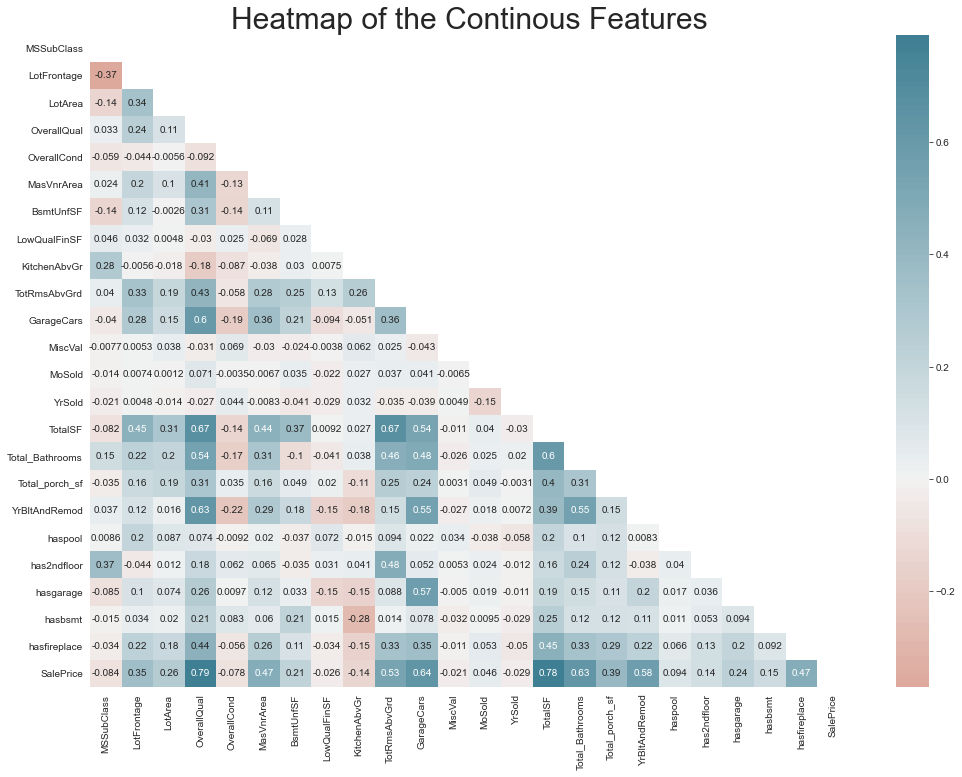

In [17]:
corr_df = train[list(train.select_dtypes(['number']).columns)].drop("SalePrice",1)
corr_df["SalePrice"] = train["SalePrice"]
corr_df = corr_df.corr()
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (17,12))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr_df, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0,
           );
## Give title. 
plt.title("Heatmap of the Continous Features", fontsize = 30);

# Outlier detection

The index of the outlier (maximum value) is 1298
The value of the outlier is 11752


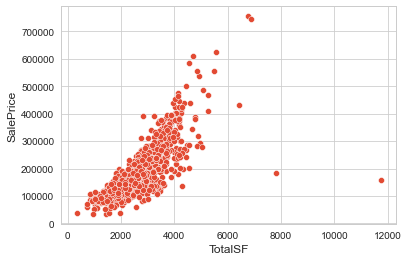

In [18]:
sns.scatterplot(x = 'TotalSF', y = 'SalePrice', data = train)
outlier_index = train.TotalSF.idxmax()
print('The index of the outlier (maximum value) is {}'.format(outlier_index))
print('The value of the outlier is {}'.format(train['TotalSF'].iloc[outlier_index, ]))

In [19]:
def outlier_detection(feature): 
    sorted(feature) 
    q1,q3 = np.percentile(feature , [25,75]) 
    IQR = q3 - q1 
    lower_range = q1 - (3 * IQR) 
    upper_range = q3 + (3 * IQR) 
    return lower_range,upper_range

# Apply the function above to all numerical variables in the dataframe. Outliers found for every variable will be stored
# in a list and then append it to a nested list that contains all of the outlier´s indexes (so one list per variable within
# the nested list).
num_features = train.select_dtypes(include = ['number']).columns
outliers = {}
list_outliers = []
for feature in num_features:
    outlier_detection(train[feature])
    lower_range, upper_range = outlier_detection(train[feature])
    overall_qual_drop = train[(train[feature] < lower_range) | (train[feature] > upper_range)]
    outliers[feature] = list(overall_qual_drop.index)
    list_outliers.append(list(overall_qual_drop.index))

# Flatten the nested list so that we have a list with all the outliers´ indexes detected for each variable.
flat_list = []
for sublist in list_outliers:
    for item in sublist:
        flat_list.append(item)

# Create a dictinary with the counts of every outlier, so that we know how many times a single observation has been 
# classified as an outlier. We then sort the dictionary by descending order.
repeated_outliers = {i: flat_list.count(i) for i in flat_list}
repeated_outliers = sorted(repeated_outliers.items(), key = lambda x: x[1], reverse = True)

# We plot the output:
print('Number of times an observation is classified as an outlier:')
print('  ')
print('Nº       Index')
for index, outliers in repeated_outliers[0:25]:
    print('{}        {}'.format(outliers, index))
    
    
    

Number of times an observation is classified as an outlier:
  
Nº       Index
6        1298
5        1182
4        197
4        523
4        1169
4        635
4        705
3        769
3        691
3        17
3        39
3        520
3        921
3        1011
3        1386
2        171
2        313
2        934
2        1337
2        249
2        335
2        529
2        943
2        375
2        178


In [20]:
outlier_index = []
for i in range(0,6):
    outlier_index.append(repeated_outliers[i][0])
print('The outliers to be removed from the dataframe are {}'.format(outlier_index))

The outliers to be removed from the dataframe are [1298, 1182, 197, 523, 1169, 635]


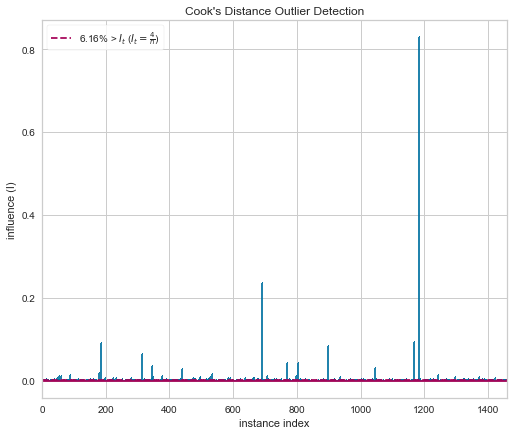

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [21]:
from yellowbrick.base import Visualizer
from yellowbrick.regressor import CooksDistance
visualizer = CooksDistance(size = (600, 500))
z = train.select_dtypes(include = ['int64', 'float64'])
visualizer.fit(z, train["SalePrice"])
visualizer.poof() 


In [22]:
outliers = visualizer.distance_ >= visualizer.influence_threshold_
outliers = list(outliers[outliers == True].index)

outlier = []
for i in range(1,len(outliers)):
    if outliers[i] in outlier_index:
               outlier.append(outliers[i])

train.drop(index = outliers, inplace = True)


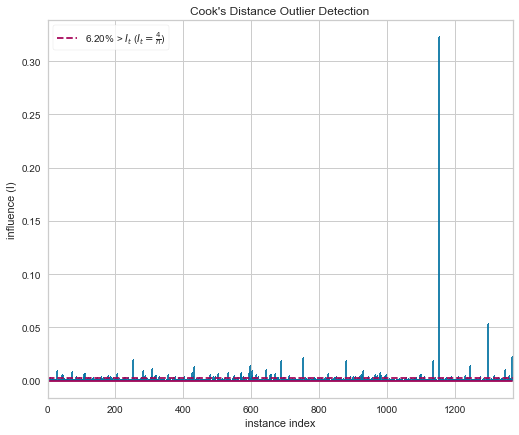

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [23]:
visualizer = CooksDistance(size = (600, 500))
z = train.select_dtypes(include = ['int64', 'float64'])
visualizer.fit(z, train["SalePrice"])
visualizer.poof() 



In [24]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson')

for feature in ['BsmtUnfSF','LotArea','LotFrontage', 'MasVnrArea', 'MiscVal', 'MoSold', 'OverallCond', 
                'OverallQual', 'TotRmsAbvGrd','Total_porch_sf', 'YrBltAndRemod', 'YrSold', 
                'TotalSF', 'Total_Bathrooms', 'MSSubClass']:
    train[feature] = pt.fit_transform(train[feature].to_numpy().reshape(-1,1))
    
    
    
    

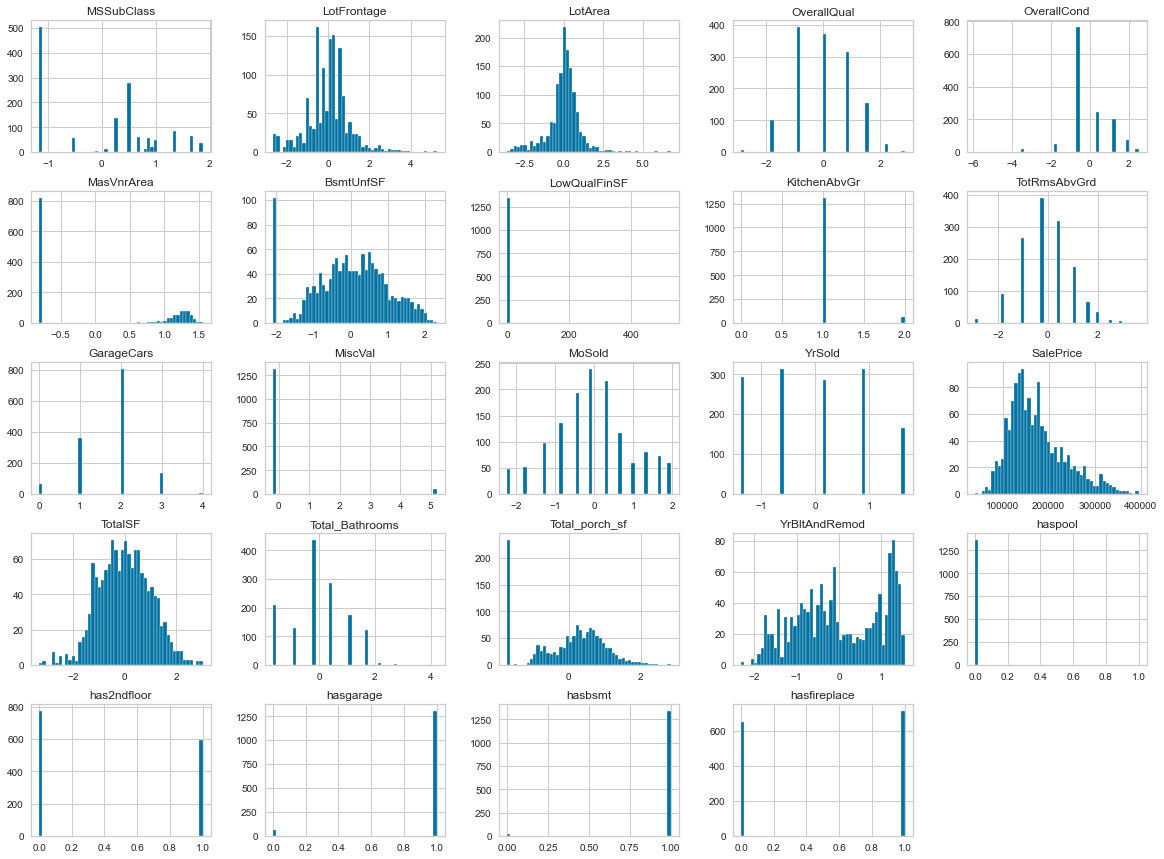

In [25]:
train.select_dtypes(include = ['int64', 'float64']).hist(bins = 50, figsize = (20,15))
plt.show()

In [26]:
train_index = train.index



for feature in train.select_dtypes(exclude = 'number'):
    train[feature] = train[feature].apply(lambda x: str(x))

x = pd.get_dummies(train, drop_first = True).copy()


train = x.loc[train_index]
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,KitchenAbvGr,TotRmsAbvGrd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.485232,-0.193484,-0.129931,0.788779,-0.519183,1.252337,-0.919080,0,1,1.037278,...,0,0,0,0,1,0,0,0,1,0
1,-1.163079,0.565294,0.127792,-0.000796,1.942286,-0.813047,-0.457030,0,1,-0.211619,...,0,0,0,0,1,0,0,0,1,0
2,0.485232,-0.039484,0.452504,0.788779,-0.519183,1.216379,-0.060780,0,1,-0.211619,...,0,0,0,0,1,0,0,0,1,0
3,0.690232,-0.452941,0.117184,0.788779,-0.519183,-0.813047,0.177470,0,1,0.449089,...,0,0,0,0,1,0,0,0,0,0
4,0.485232,0.763275,0.947053,1.520503,-0.519183,1.351846,0.068419,0,1,1.567762,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.485232,-0.348724,-0.260338,-0.000796,-0.519183,-0.813047,0.928585,0,1,0.449089,...,0,0,0,0,1,0,0,0,1,0
1456,-1.163079,0.812510,0.780748,-0.000796,0.468748,1.154454,0.279389,0,1,0.449089,...,0,0,0,0,1,0,0,0,1,0
1457,0.690232,-0.142016,0.006453,0.788779,2.513147,-0.813047,0.805401,0,1,1.567762,...,0,0,0,0,1,0,0,0,1,0
1458,-1.163079,-0.039484,0.152422,-0.862187,0.468748,-0.813047,-2.092026,0,1,-0.966335,...,0,0,0,0,1,0,0,0,1,0


In [27]:
train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1370, dtype: int64

<AxesSubplot:>

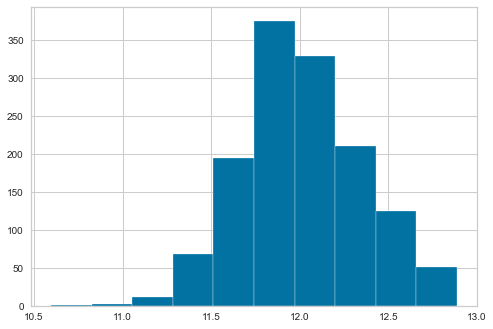

In [28]:
# We apply the logarithmic transformation.
train["SalePrice"] = np.log1p(train["SalePrice"])

# We check the new dependent variable´s distribution.
train["SalePrice"].hist() 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train, x_test, y_train, y_test = train_test_split(train.loc[:,train.columns != 'SalePrice'], train['SalePrice'], test_size=0.2, random_state =23)
                                                    


# Implement the multiple linear regression model
ols = LinearRegression(fit_intercept = True) 
ols.fit(x_train, y_train)

# Check the model´s performance
print('Training set R-squared is {}'.format(ols.score(x_train, y_train)))
print('Testing set R-squared is {}'.format(ols.score(x_test, y_test)))



Training set R-squared is 0.947161538153586
Testing set R-squared is -9.804686142693987e+16


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train, x_test, y_train, y_test = train_test_split(train.loc[:,train.columns != 'SalePrice'], train['SalePrice'], test_size=0.2, random_state =135)
                                                    


# Implement the multiple linear regression model
ols = LinearRegression(fit_intercept = True) 
ols.fit(x_train, y_train)

# Check the model´s performance
print('Training set R-squared is {}'.format(ols.score(x_train, y_train)))
print('Testing set R-squared is {}'.format(ols.score(x_test, y_test)))




Training set R-squared is 0.9419240371708555
Testing set R-squared is 0.9223302693018622


In [50]:
prediction = ols.predict(x_test)

# Check accuracy with MSE
from sklearn.metrics import mean_squared_error
print('The mean squared error (MSE) is {}'.format(mean_squared_error(y_test, prediction)))

# Check accuracy with RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print('The root mean squared error (RMSE) is {}'.format(sqrt(mean_squared_error(y_test, prediction))))

# Check the accuracy of the model with the test dataset.
from sklearn.metrics import mean_absolute_error
print('The mean absolute error (MAE) is {}'.format(mean_absolute_error(y_test, prediction)))

The mean squared error (MSE) is 0.008244386873105965
The root mean squared error (RMSE) is 0.09079860611873931
The mean absolute error (MAE) is 0.06995918065776063


In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

# Check the model´s performance.
print('Training set R-squared is {}'.format(lasso.score(x_train, y_train)))
print('Testing set R-squared is {}'.format(lasso.score(x_test, y_test)))
print('Amount of penalization is {}'.format(lasso.alpha))

Training set R-squared is 0.0
Testing set R-squared is -0.00859753498315774
Amount of penalization is 1.0


In [52]:
from sklearn.linear_model import LassoCV
cv_lasso = LassoCV(n_alphas = 200, cv = 10, max_iter = 1000, fit_intercept = True) 
cv_lasso.fit(x_train, y_train)

# Check Lasso´s performance and best parameters as outcomes of cross validation.
print('Training set R-squared is {}'.format(cv_lasso.score(x_train, y_train)))
print('Testing set R-squared is {}'.format(cv_lasso.score(x_test, y_test)))
print('Amount of penalization is {}'.format(cv_lasso.alpha_))

Training set R-squared is 0.9195123310060255
Testing set R-squared is 0.9242451167914678
Amount of penalization is 0.0005180538223190736


In [53]:
# Predict SalePrices with the model.
prediction = cv_lasso.predict(x_test)

# Check accuracy with MSE
print('The mean squared error (MSE) is {}'.format(mean_squared_error(y_test, prediction)))

# Check accuracy with RMSE
print('The root mean squared error (RMSE) is {}'.format(sqrt(mean_squared_error(y_test, prediction))))

# Check the accuracy of the model with MAE
print('The mean absolute error (MAE) is {}'.format(mean_absolute_error(y_test, prediction)))

The mean squared error (MSE) is 0.008041132099780446
The root mean squared error (RMSE) is 0.0896723597313043
The mean absolute error (MAE) is 0.06859029585551979
